# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd
import numpy as np

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### Explore

In [2]:
data.shape

(414, 7)

In [3]:
data.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

Although all fields are numerical by type, transaction_date and local_convenience_stores are categorical since they are discrete values.

In [4]:
# features
features = data.iloc[:,:6]
# label
label = data.iloc[:,6]

numerical_features = data[['house_age', 'transit_distance', 'latitude', 'longitude']]
categorical_features = data[['transaction_date', 'local_convenience_stores']]

### Visualize

We will now explore the behavior of the label and its relationship between the features.

#### Price Distribution

Mean:  37.98019323671498
Mean:  38.45


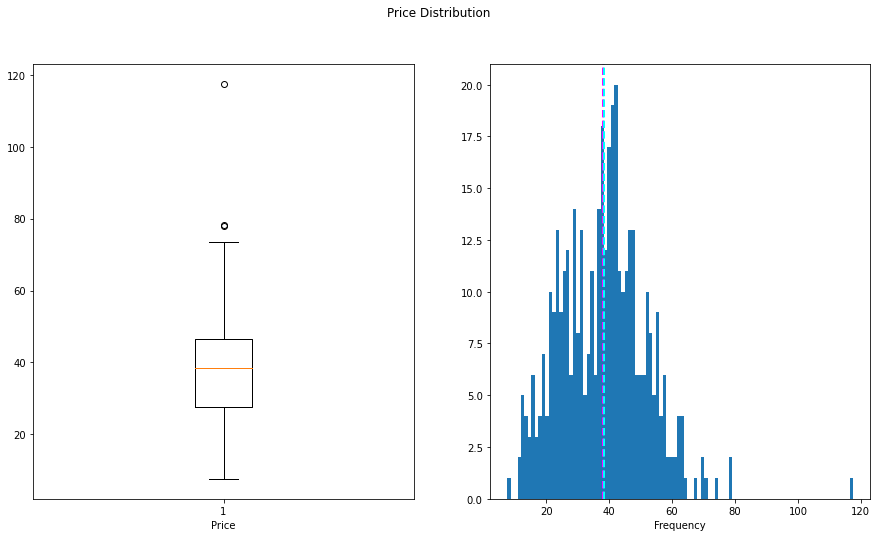

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt

# Create figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

# Plot Boxplot
ax[0].boxplot(label)
ax[0].set_xlabel("Price")

# Plot Histogram
ax[1].hist(label, bins = 100)
ax[1].set_xlabel("Frequency")

# Add mean and median lines
ax[1].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[1].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

print("Mean: ", label.mean())
print("Mean: ", label.median())

fig.suptitle("Price Distribution")
plt.rcParams.update({'font.size': 16})
plt.show()

The histogram shows a right skew. Outliers exist between 100 and 120. We can remove them to improve the results.

#### Remove Outliers

In [6]:
data = data[data['price_per_unit'] < 70]
data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


Mean:  37.341421568627446
Mean:  38.25


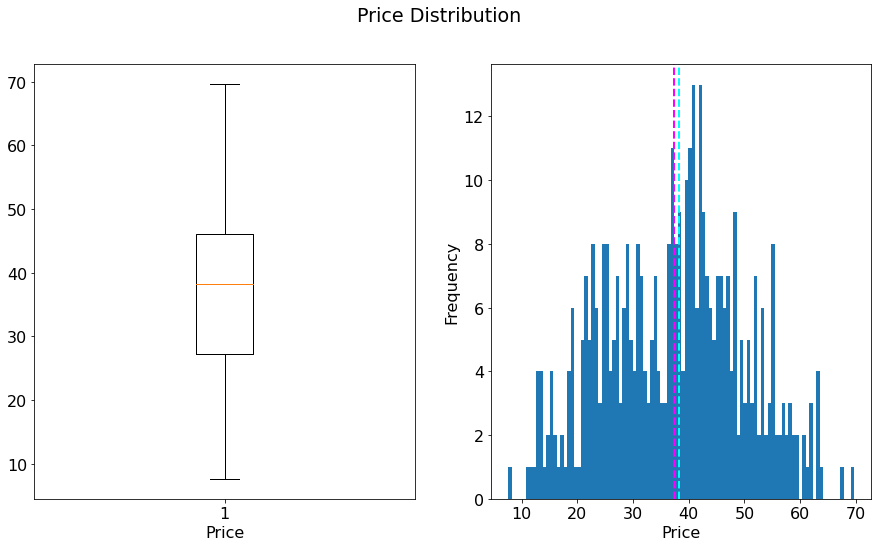

In [7]:
# label
new_label = data.iloc[:,6]

# Create figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

# Plot Boxplot
ax[0].boxplot(new_label)
ax[0].set_xlabel("Price")

# Plot Histogram
ax[1].hist(new_label, bins = 100)
ax[1].set_xlabel("Price")
ax[1].set_ylabel("Frequency")


# Add mean and median lines
ax[1].axvline(new_label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[1].axvline(new_label.median(), color='cyan', linestyle='dashed', linewidth=2)

print("Mean: ", new_label.mean())
print("Mean: ", new_label.median())

fig.suptitle("Price Distribution")
plt.rcParams.update({'font.size': 16})

plt.show()

The label distribution clearly shows a normal distribution after removing the outlier.

#### Price VS Numerical Features

In [8]:
numerical_features = data[['house_age', 'transit_distance', 'latitude', 'longitude']]
categorical_features = data[['transaction_date', 'local_convenience_stores']]

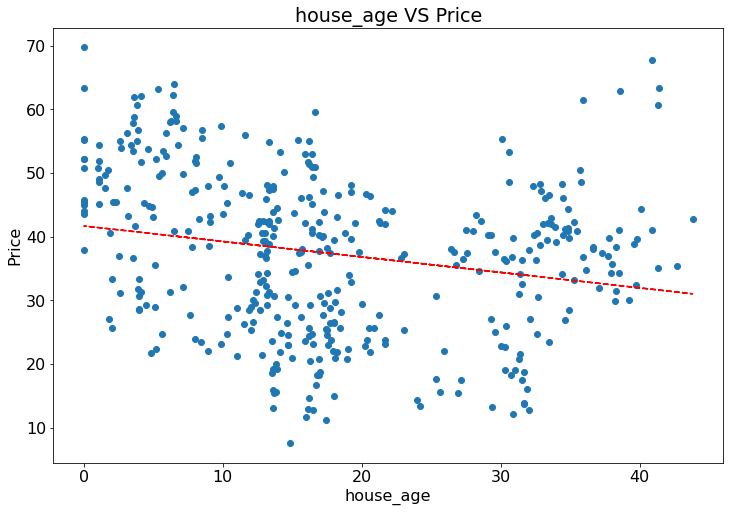

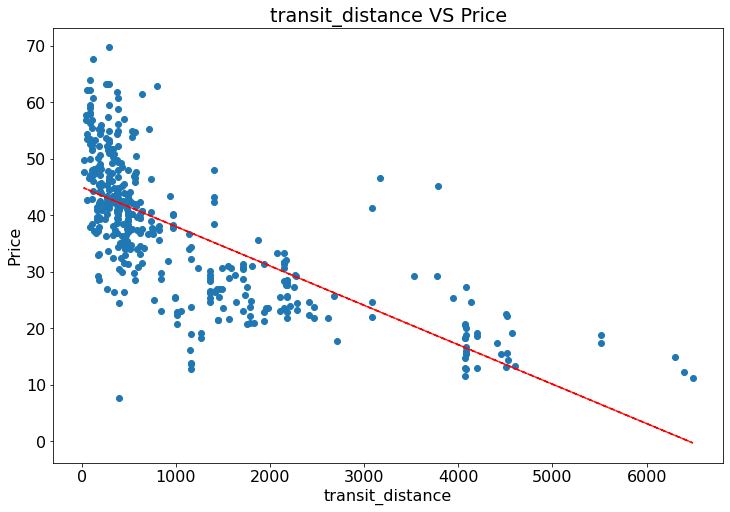

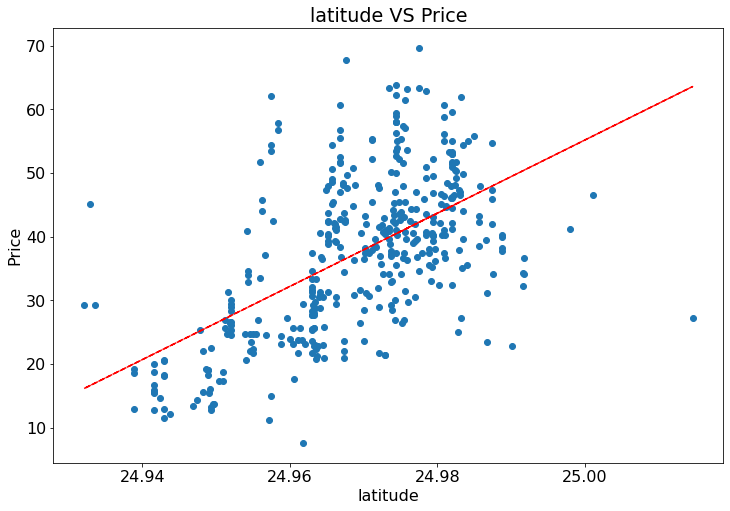

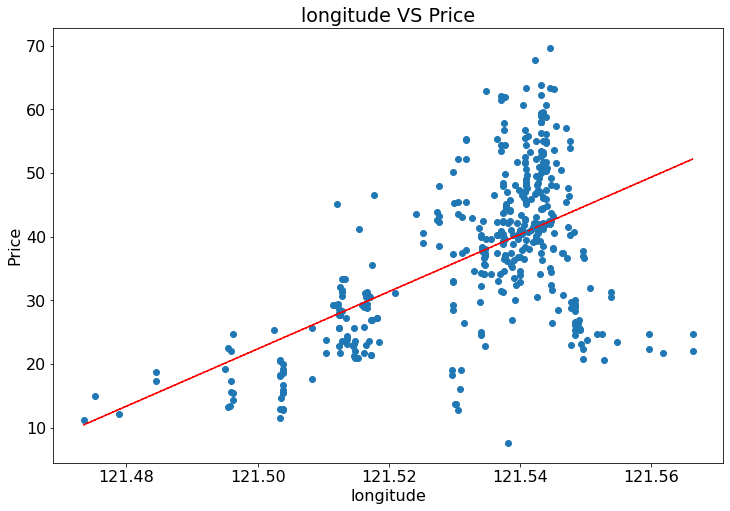

In [9]:
for col in numerical_features:
    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(12, 8))
    feature = data[col]
    plt.scatter(feature, new_label)
    
    trend_line = np.polyfit(feature, new_label, 1)
    p = np.poly1d(trend_line)
    plt.plot(feature,p(feature),"r--")
    
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(col + " VS Price")
plt.show()
    

                  house_age  transit_distance  latitude  longitude  \
house_age          1.000000          0.023193  0.060701  -0.045653   
transit_distance   0.023193          1.000000 -0.589136  -0.806140   
latitude           0.060701         -0.589136  1.000000   0.410505   
longitude         -0.045653         -0.806140  0.410505   1.000000   
price_per_unit    -0.220131         -0.708778  0.574714   0.556045   

                  price_per_unit  
house_age              -0.220131  
transit_distance       -0.708778  
latitude                0.574714  
longitude               0.556045  
price_per_unit          1.000000  


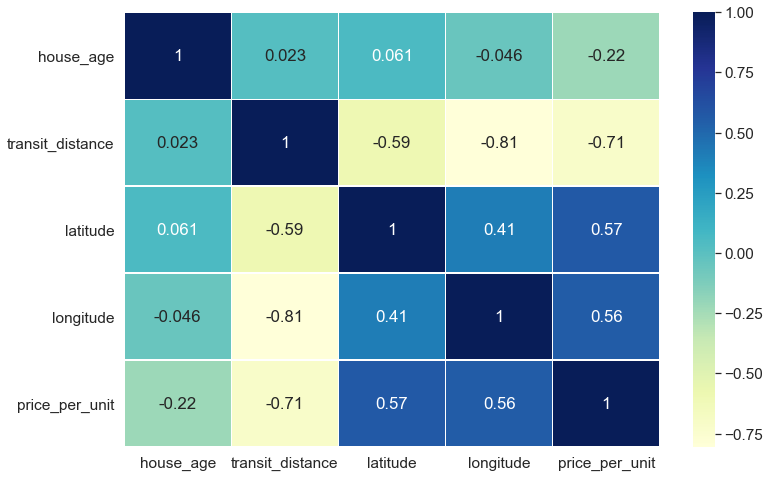

In [10]:
# Correlation Matrix
import seaborn as sns

corr_features = data[['house_age', 'transit_distance', 'latitude', 'longitude', 'price_per_unit']]

fig = plt.figure(figsize=(12, 8))

corrs = corr_features.corr()
# prints correlations
print(corrs)
  
# plotting correlation heatmap
sns.set(font_scale=1.4)
heatmap = sns.heatmap(corrs, cmap="YlGnBu", annot=True, linewidths=.5) 

# this automatically increases annot font
# annot_kws={"size": 35 / np.sqrt(len(corrs))
  
# displaying heatmap
plt.show()

Correlation between price and transit distance is -0.69 which is the highest.
The transit distance negatively affects the price of the unit.

#### Price VS Categorical Features

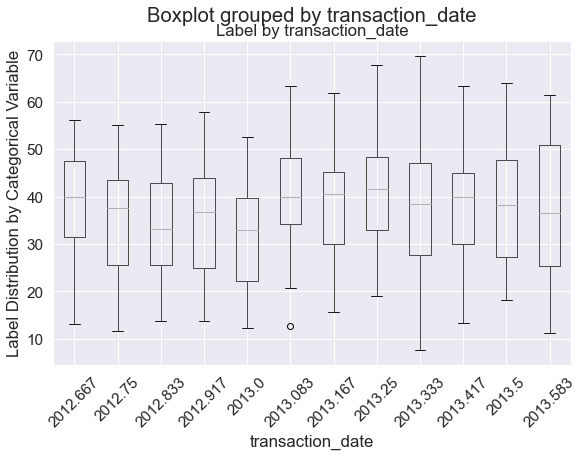

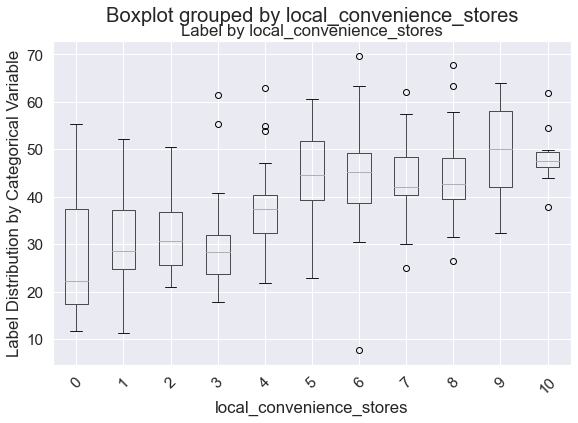

In [11]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax, rot = 45)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

In [12]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

The data is clean and already preprocessed. Therefore, we can start the training process.

In [13]:
# features
X = data.iloc[:,1:6]
# label
Y = data.iloc[:,6]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 31)
print("X Train Size: ", x_train.shape)
print("X Test Size: ", x_test.shape)
print("Y Train Size: ", y_train.shape)
print("Y Test Size: ", y_test.shape)

X Train Size:  (326, 5)
X Test Size:  (82, 5)
Y Train Size:  (326,)
Y Test Size:  (82,)


In [14]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('linear model', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('linear model', RandomForestRegressor())])


MSE: 38.83203829102123
RMSE: 6.23153578911501
R2: 0.6873699884351063


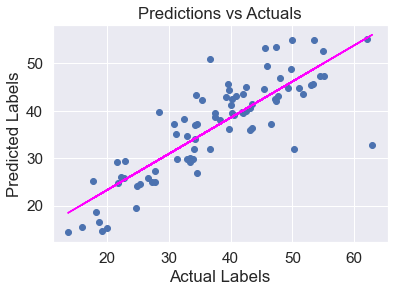

In [15]:
# predict
predictions = model.predict(x_test)

# score
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [16]:
# Save model

import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
50.87
15.36


C:\Users\hhane\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
